# Homework Assignment 3
## Mindy Tran
-------------------------
In class we played with downloading and aligning sequences from the internet.
In our exploration we found that the SARS-CoV-2 Spike locus has significant
similarity to a bat coronavirus RaTG13 Spike protein. For your homework I’d
like you to adapt the tools and code in the Week 3 notebook to do the following
things

**Question 1:** Align the bat coronavirus RaTG13 Spike protein sequence to the aligned
set of spike sequences we created in class as proteins. This is a challenging
task, but all of the code to do this is shown in the week 3 notebook. You
just have to put together the pieces. Here are the steps you could take to
complete this problem:
1. download the bat coronavirus RaTG13 sequence (last thing in Week
3 notebook)
2. read in the nucleotide alignments of covid genomes we made in class
with (we called it “temp.aligned.fasta”)
3. extract the bit of the alignment that is the spike (‘s’) protein
4. translate those sequences to proteins
5. create a new alignment using mafft where you have now added the
bat protein to the set of human-born SARs-CoV-2 sequences. mafft
can align protein and DNA sequences, so no worries there.

In [1]:
## 1. download the bat coronavirus RaTG13 sequence

from Bio import Entrez
from Bio import SeqIO


# get the reference seq
Entrez.email = "fake_email@thanks.com"
with Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="NC_045512.2") as handle:
    refseq = SeqIO.read(handle, "gb")

Entrez.email = "fake_email@thanks.com"
with Entrez.efetch(db="protein", rettype="gb", retmode="text", id="QHR63300.2") as handle:
    bat_spike = SeqIO.read(handle, "gb")
print("downloaded", refseq.id, bat_spike.description)


downloaded NC_045512.2 spike glycoprotein [Bat coronavirus RaTG13]


In [2]:
## 2. read in the nucleotide alignments of covid genomes we made in class with (we called it “temp.aligned.fasta”)
from Bio import AlignIO

#import and look at it
new_align = AlignIO.read("temp.aligned.fasta","fasta")
print(new_align)

Alignment with 26 rows and 29903 columns
--------------ccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Wuhan/WIV06/2019|EPI_ISL_402129|2019-12-30
-------------accttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Wuhan/WIV07/2019|EPI_ISL_402130|2019-12-30
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF012/2020|EPI_ISL_403932|2020-01-14
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF013/2020|EPI_ISL_403933|2020-01-15
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF014/2020|EPI_ISL_403934|2020-01-15
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF025/2020|EPI_ISL_403935|2020-01-15
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF028/2020|EPI_ISL_403936|2020-01-17
-----------ataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Guangdong/20SF040/2020|EPI_ISL_403937|2020-01-18
attaaaggtttataccttcccaggtaacaaaccaaccaactttc...--- hCoV-19/Wuhan/IPBCAMS-WH-03/2019|EPI_ISL_403930|2019-12-

In [3]:
## 3. extract the bit of the alignment that is the spike (‘s’) protein
from Bio.Align import MultipleSeqAlignment

# find S gene index
# gene_list = [ x  for x in bat_spike.features if x.type == 'CDS']
# find S gene index
gene_list = [ x  for x in refseq.features if x.type == 'CDS']


# let's get our little slice of the alignment that corresponds to this locus
spike_align = MultipleSeqAlignment([gene_list[2].extract(new_align[i]) for i in range(len(new_align))])
print(spike_align)

Alignment with 26 rows and 3822 columns
atgtttgtttttcttgttttattgccactagtctctagtcagtg...taa hCoV-19/Wuhan/WIV06/2019|EPI_ISL_402129|2019-12-30
atgtttgtttttcttgttttattgccactagtctctagtcagtg...taa hCoV-19/Wuhan/WIV07/2019|EPI_ISL_402130|2019-12-30
atgtttgtttttcttgttttattgccactagtctctagtcagtg...taa hCoV-19/Guangdong/20SF012/2020|EPI_ISL_403932|2020-01-14
atgtttgtttttcttgttttattgccactagtctctagtcagtg...taa hCoV-19/Guangdong/20SF013/2020|EPI_ISL_403933|2020-01-15
atgtttgtttttcttgttttattgccactagtctctagtcagtg...taa hCoV-19/Guangdong/20SF014/2020|EPI_ISL_403934|2020-01-15
atgtttgtttttcttgttttattgccactagtctctagtcagtg...taa hCoV-19/Guangdong/20SF025/2020|EPI_ISL_403935|2020-01-15
atgtttgtttttcttgttttattgccactagtctctagtcagtg...taa hCoV-19/Guangdong/20SF028/2020|EPI_ISL_403936|2020-01-17
atgtttgtttttcttgttttattgccactagtctctagtcagtg...taa hCoV-19/Guangdong/20SF040/2020|EPI_ISL_403937|2020-01-18
atgtttgtttttcttgttttattgccactagtctctagtcagtg...taa hCoV-19/Wuhan/IPBCAMS-WH-03/2019|EPI_ISL_403930|2019-12-3

In [4]:
## 4. translate those sequences to proteins
for i in range(len(spike_align)):
    spike_align[i].seq = spike_align[i].seq.translate()

In [18]:
# print(spike_align)

In [6]:
## 5. create a new alignment using mafft where you have now added the bat protein to 
##    the set of human-born SARs-CoV-2 sequences. mafft can align protein and DNA sequences, so no worries there.
import os
from Bio.Align.Applications import MafftCommandline


# then make a list from new_align and add bat_spike; write to temp.fasta
longer_list = [x for x in spike_align]
longer_list.append(bat_spike)
SeqIO.write(longer_list, "bat.fasta", "fasta")

#now run alignment
mafft_cline = MafftCommandline("mafft", input="bat.fasta")
muscle_exe = "/opt/tljh/user/bin/mafft"
assert os.path.isfile(muscle_exe), "mafft executable missing"
stdout, stderr = mafft_cline()
with open("aligned_bat.fasta", "w") as handle:
    handle.write(stdout)
    
#import and look at it
bat_align = AlignIO.read("aligned_bat.fasta","fasta")
print(bat_align)

Alignment with 27 rows and 1273 columns
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT hCoV-19/Wuhan/WIV06/2019|EPI_ISL_402129|2019-12-30
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT hCoV-19/Wuhan/WIV07/2019|EPI_ISL_402130|2019-12-30
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT hCoV-19/Guangdong/20SF012/2020|EPI_ISL_403932|2020-01-14
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT hCoV-19/Guangdong/20SF013/2020|EPI_ISL_403933|2020-01-15
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT hCoV-19/Guangdong/20SF014/2020|EPI_ISL_403934|2020-01-15
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT hCoV-19/Guangdong/20SF025/2020|EPI_ISL_403935|2020-01-15
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT hCoV-19/Guangdong/20SF028/2020|EPI_ISL_403936|2020-01-17
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT hCoV-19/Guangdong/20SF040/2020|EPI_ISL_403937|2020-01-18
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT hCoV-19/Wuhan/IPBCAMS-WH-03/2019|EPI_ISL_403930|2019-12-3

**Question 2:** Using that alignment above create a visualization of the number of differences between pairs of sequences– perhaps a heatmap as in class or a
histogram. Is the bat coronavirus sequence diverged from the others?

Let's compute the number of nucleotide differences among Spike sequences in our sample, let's build a matrix of them, and let's visualize them.

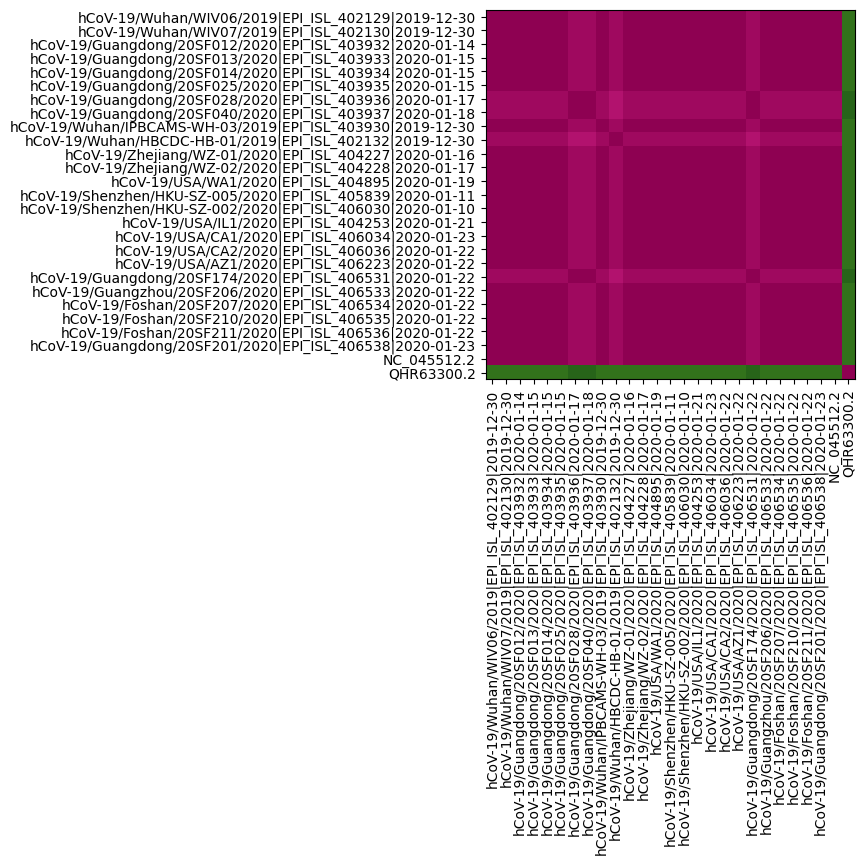

In [16]:
from matplotlib import pyplot as plt
import numpy as np

def count_diffs2(align, seq1, seq2):
    '''compute the number of nucleotide differences among Spike sequences'''
    diffs = 0
    for i in range(len(align[0].seq)):
        if align[seq1, i] != align[seq2, i] and align[seq1, i] != '-' \
            and align[seq2, i] != "-":
            diffs += 1
    return(diffs)


n = len(bat_align)
dist_mat = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        dist_mat[i,j] = count_diffs2(bat_align,i,j)

plt.imshow(dist_mat, cmap='PiYG', interpolation='nearest')
plt.xticks(range(n), [x.id for x in bat_align])
plt.yticks(range(n), [x.id for x in bat_align])
plt.xticks(rotation=90);